    SKU Product type  Daily_Demand  Lead times  safety_stock  Reorder_Point
0  SKU0     haircare     26.733333           7            20     207.133333
1  SKU1     skincare     24.533333          30            20     756.000000
2  SKU2     haircare      0.266667          10            20      22.666667
3  SKU3     skincare      2.766667          13            20      55.966667
4  SKU4     skincare     29.033333           3            20     107.100000


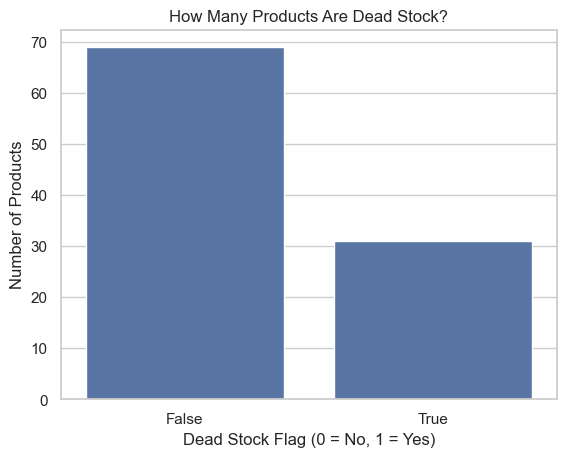

In [13]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np 
df=pd.read_csv("supply_chain_data.csv")
pd.set_option('display.max_rows', 50)
# Calculate daily demand (assuming 30-day month)
df['Daily_Demand'] = df['Number of products sold'] / 30

# Add safety stock (constant for now)
df['safety_stock'] = 20

# Calculate Reorder Point = (Daily Demand × Lead Time) + Safety Stock
df['Reorder_Point'] = (df['Daily_Demand'] * df['Lead times']) + df['safety_stock']

# Display results
print(df[['SKU', 'Product type', 'Daily_Demand', 'Lead times', 'safety_stock', 'Reorder_Point']].head())
# Generate simulated Last_Movement_Date column (random date within past 90 days)
np.random.seed(42)  # Optional: ensures same random output every run
start_date = datetime.today() - timedelta(days=90)

df['Last_Movement_Date'] = [
    start_date + timedelta(days=int(x))
    for x in np.random.randint(0, 91, size=len(df))
]

from datetime import datetime,timedelta
import numpy as np
#convert Last_Movement_Date to datetime
df['Last_Movement_Date'] = pd.to_datetime(df['Last_Movement_Date'])
# Flag as dead stock if no activity in last 60 days
today = pd.to_datetime("today")
df['Dead_Stock'] = (df['Availability'] > 0) & (df['Last_Movement_Date'] < (today - timedelta(days=60)))

import seaborn as sns
import matplotlib.pyplot as plt
#Make sure Seaborn looks nice
sns.set(style="whitegrid")

#Create the plot
sns.countplot(data=df,x='Dead_Stock')

#Add title and Labels
plt.title("How Many Products Are Dead Stock?")
plt.xlabel("Dead Stock Flag (0 = No, 1 = Yes)")
plt.ylabel("Number of Products")

# Show the chart
plt.show()




In [ ]:
import pandas as pd
